In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/averagerevisit3.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']]
sec1 = sec1.dropna()
print(sec1.shape)
sec1new = np.array(sec1)
sec1new = pd.DataFrame(sec1new)
sec1new.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
sec1new

(987, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
0,3/1/2012,78.789,109.27,654,406
1,3/2/2012,79.403,107.17,655,411
2,3/5/2012,79.3,107.18,660.75,409
3,3/6/2012,79.866,105.21,654,425
4,3/7/2012,79.712,106.65,638.75,430
5,3/8/2012,79.139,107.06,635.5,430
6,3/9/2012,80.041,107.87,645,429
7,3/12/2012,79.89,106.84,659.5,433
8,3/13/2012,80.193,107.24,662,431
9,3/14/2012,80.565,105.95,658.75,430


In [9]:
X = sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y = sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=200, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 80.318, test: 326.128
R^2 train: 0.983, test: 0.929


In [10]:
forest.feature_importances_

array([ 0.248356  ,  0.09425039,  0.65739361])

In [117]:
ureapredicted = forest.predict(X)
ureapredicted = pd.DataFrame(ureapredicted)
ureapredicted.columns = ['Predicted Urea_Sec1_Suggest']
ureapredicted

,Predicted Urea_Sec1_Suggest
0,415.857500
1,419.716667
2,427.593835
3,428.750786
4,447.442500
5,441.874417
6,480.052500
7,432.340232
8,429.507042
9,422.870952


In [118]:
#how to add a new column, predicted urea
sec1new['Predicted Urea_Sec1_Suggest'] = ureapredicted
sec1new

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest
0,3/1/2012,78.789,109.27,654,406,415.857500
1,3/2/2012,79.403,107.17,655,411,419.716667
2,3/5/2012,79.3,107.18,660.75,409,427.593835
3,3/6/2012,79.866,105.21,654,425,428.750786
4,3/7/2012,79.712,106.65,638.75,430,447.442500
5,3/8/2012,79.139,107.06,635.5,430,441.874417
6,3/9/2012,80.041,107.87,645,429,480.052500
7,3/12/2012,79.89,106.84,659.5,433,432.340232
8,3/13/2012,80.193,107.24,662,431,429.507042
9,3/14/2012,80.565,105.95,658.75,430,422.870952


In [14]:
#example on averaging and error of predicted and actual
avg_urea = (sec1new['2monthurea']+ sec1new['Predicted Urea_Sec1_Suggest'])/2
avg_urea = pd.DataFrame(avg_urea)
error = (abs(sec1new['Predicted Urea_Sec1_Suggest'] - sec1new['2monthurea'])/sec1new['2monthurea'])*100
sec1new['Average Urea'] = avg_urea
sec1new['Error'] = error
print(error.mean())
sec1new


2.22008243627


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest,Average Urea,Error
0,3/1/2012,78.789,109.27,654,406,415.857500,410.929,2.42796
1,3/2/2012,79.403,107.17,655,411,419.716667,415.358,2.12084
2,3/5/2012,79.3,107.18,660.75,409,427.593835,418.297,4.54617
3,3/6/2012,79.866,105.21,654,425,428.750786,426.875,0.882538
4,3/7/2012,79.712,106.65,638.75,430,447.442500,438.721,4.0564
5,3/8/2012,79.139,107.06,635.5,430,441.874417,435.937,2.76149
6,3/9/2012,80.041,107.87,645,429,480.052500,454.526,11.9003
7,3/12/2012,79.89,106.84,659.5,433,432.340232,432.67,0.152371
8,3/13/2012,80.193,107.24,662,431,429.507042,430.254,0.346394
9,3/14/2012,80.565,105.95,658.75,430,422.870952,426.435,1.65792


## Want to Compare Monthly

In [15]:
#monthly predictions
may_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][0:22]
jun_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][22:42]
jul_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][42:65]
aug_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][65:86]
sep_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][86:108]
oct_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][108:131]
nov_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][131:151]
dec_12 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][151:174]
jan_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][174:194]
feb_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][194:212]
mar_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][212:232]
apr_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][232:251]
may_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][251:271]
jun_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][271:293]
jul_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][293:315]
aug_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][315:335]
sep_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][335:357]
oct_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][357:378]
nov_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][378:398]
dec_13 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][398:421]
jan_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][421:440]
feb_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][440:459]
mar_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][459:481]
apr_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][481:501]
may_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][501:522]
jun_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][522:544]
jul_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][544:565]
aug_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][565:586]
sep_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][586:609]
oct_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][609:630]
nov_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][630:652]
dec_14 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][652:675]
jan_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][675:693]
feb_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][693:709]
mar_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][709:728]
apr_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][728:746]
may_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][746:764]
jun_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][764:783]
jul_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][783:802]
aug_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][802:822]
sep_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][822:844]
oct_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][844:862]
nov_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][862:883]
dec_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][883:905]
jan_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][905:924]
feb_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][924:946]
mar_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][946:966]
apr_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest','Error']][966:987]


In [16]:
#putting actual monthly urea avg into an array which I can then put into a dataframe so then I can plot
import numpy as np
actual_monthly_avg = np.array([may_12['2monthurea'].mean(),jun_12['2monthurea'].mean(),
                               jul_12['2monthurea'].mean(),aug_12['2monthurea'].mean(),
                               sep_12['2monthurea'].mean(),oct_12['2monthurea'].mean(),
                               nov_12['2monthurea'].mean(),dec_12['2monthurea'].mean(),
                               jan_13['2monthurea'].mean(),feb_13['2monthurea'].mean(),
                               mar_13['2monthurea'].mean(),apr_13['2monthurea'].mean(),
                               may_13['2monthurea'].mean(),jun_13['2monthurea'].mean(),
                               jul_13['2monthurea'].mean(),aug_13['2monthurea'].mean(),
                               sep_13['2monthurea'].mean(),oct_13['2monthurea'].mean(),
                               nov_13['2monthurea'].mean(),dec_13['2monthurea'].mean(),
                               jan_14['2monthurea'].mean(),feb_14['2monthurea'].mean(),
                               mar_14['2monthurea'].mean(),apr_14['2monthurea'].mean(),
                               may_14['2monthurea'].mean(),jun_14['2monthurea'].mean(),
                               jul_14['2monthurea'].mean(),aug_14['2monthurea'].mean(),
                               sep_14['2monthurea'].mean(),oct_14['2monthurea'].mean(),
                               nov_14['2monthurea'].mean(),dec_14['2monthurea'].mean(),
                               jan_15['2monthurea'].mean(),feb_15['2monthurea'].mean(),
                               mar_15['2monthurea'].mean(),apr_15['2monthurea'].mean(),
                               may_15['2monthurea'].mean(),jun_15['2monthurea'].mean(),
                               jul_15['2monthurea'].mean(),aug_15['2monthurea'].mean(),
                               sep_15['2monthurea'].mean(),oct_15['2monthurea'].mean(),
                               nov_15['2monthurea'].mean(),dec_15['2monthurea'].mean(),
                               jan_16['2monthurea'].mean(),feb_16['2monthurea'].mean(),
                               mar_16['2monthurea'].mean(),apr_16['2monthurea'].mean()])
actual_monthly_avg

array([ 447.77272727,  471.25      ,  439.04347826,  414.19047619,
        440.77272727,  429.65217391,  426.3       ,  426.95652174,
        406.1       ,  415.38888889,  425.6       ,  426.42105263,
        388.3       ,  351.45454545,  328.27272727,  315.55      ,
        315.5       ,  289.04761905,  284.45      ,  287.39130435,
        316.94736842,  343.10526316,  389.09090909,  390.35      ,
        355.33333333,  320.13636364,  286.57142857,  310.71428571,
        317.52173913,  340.9047619 ,  328.        ,  311.65217391,
        314.61111111,  326.8125    ,  330.89473684,  302.33333333,
        275.61111111,  260.26315789,  294.68421053,  287.65      ,
        282.13636364,  276.77777778,  257.57142857,  253.36363636,
        242.94736842,  232.36363636,  204.15      ,  225.71428571])

In [17]:
pred_monthly_avg = np.array([may_12['Predicted Urea_Sec1_Suggest'].mean(),jun_12['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_12['Predicted Urea_Sec1_Suggest'].mean(),aug_12['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_12['Predicted Urea_Sec1_Suggest'].mean(),oct_12['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_12['Predicted Urea_Sec1_Suggest'].mean(),dec_12['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_13['Predicted Urea_Sec1_Suggest'].mean(),feb_13['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_13['Predicted Urea_Sec1_Suggest'].mean(),apr_13['Predicted Urea_Sec1_Suggest'].mean(),
                               may_13['Predicted Urea_Sec1_Suggest'].mean(),jun_13['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_13['Predicted Urea_Sec1_Suggest'].mean(),aug_13['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_13['Predicted Urea_Sec1_Suggest'].mean(),oct_13['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_13['Predicted Urea_Sec1_Suggest'].mean(),dec_13['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_14['Predicted Urea_Sec1_Suggest'].mean(),feb_14['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_14['Predicted Urea_Sec1_Suggest'].mean(),apr_14['Predicted Urea_Sec1_Suggest'].mean(),
                               may_14['Predicted Urea_Sec1_Suggest'].mean(),jun_14['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_14['Predicted Urea_Sec1_Suggest'].mean(),aug_14['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_14['Predicted Urea_Sec1_Suggest'].mean(),oct_14['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_14['Predicted Urea_Sec1_Suggest'].mean(),dec_14['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_15['Predicted Urea_Sec1_Suggest'].mean(),feb_15['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_15['Predicted Urea_Sec1_Suggest'].mean(),apr_15['Predicted Urea_Sec1_Suggest'].mean(),
                               may_15['Predicted Urea_Sec1_Suggest'].mean(),jun_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jul_15['Predicted Urea_Sec1_Suggest'].mean(),aug_15['Predicted Urea_Sec1_Suggest'].mean(),
                               sep_15['Predicted Urea_Sec1_Suggest'].mean(),oct_15['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_15['Predicted Urea_Sec1_Suggest'].mean(),dec_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_16['Predicted Urea_Sec1_Suggest'].mean(),feb_16['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_16['Predicted Urea_Sec1_Suggest'].mean(),apr_16['Predicted Urea_Sec1_Suggest'].mean()])
pred_monthly_avg

array([ 450.22100488,  467.96010089,  429.44853144,  407.42501086,
        436.91581514,  429.65849089,  426.8879891 ,  425.15453034,
        410.30455208,  415.90279872,  425.84358999,  424.74428859,
        392.33034583,  350.9618735 ,  329.93626847,  323.64009827,
        313.96259493,  291.61564769,  288.44345764,  305.23264639,
        340.50794898,  348.47706175,  371.49967709,  357.82576169,
        342.88024936,  324.81947737,  306.36552049,  312.37512344,
        318.7886068 ,  339.83693079,  329.23170606,  311.40016934,
        314.80775259,  326.14643205,  326.8489123 ,  300.93008418,
        270.79426874,  265.66259736,  289.49441912,  288.09195109,
        280.05931353,  271.76329723,  261.64790422,  267.32036924,
        245.92582996,  231.88618863,  204.98754762,  225.31976161])

In [18]:
#putting the arrays into a dataframe
from datetime import datetime
actual_monthly_avg = pd.DataFrame(actual_monthly_avg)
pred_monthly_avg = pd.DataFrame(pred_monthly_avg)
monthly_date = ['5/2012','6/2012','7/2012','8/2012','9/2012','10/2012','11/2012','12/2012',
                         '1/2013','2/2013','3/2013','4/2013','5/2013','6/2013','7/2013','8/2013',
                         '9/2013','10/2013','11/2013','12/2013','1/2014','2/2014','3/2014','4/2014',
                         '5/2014','6/2014','7/2014','8/2014','9/2014','10/2014','11/2014','12/2014',
                         '1/2015','2/2015','3/2015','4/2015','5/2015','6/2015','7/2015','8/2015',
                         '9/2015','10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016']
monthly_date = pd.to_datetime(monthly_date)
monthly_date.strftime('%b-%y')
monthly_date = pd.DataFrame(monthly_date)
monthly_date.columns = ['Monthly_Date']

In [19]:
upperbound = pred_monthly_avg + pred_monthly_avg.std()
lowerbound = pred_monthly_avg - pred_monthly_avg.std()

In [20]:
monthly_date['Actual_Monthly_Avg'] = actual_monthly_avg
monthly_date['Pred_Monthly_Avg'] = pred_monthly_avg
monthly_date['Upper_Bound'] = upperbound
monthly_date['Lower_Bound'] = lowerbound
monthly_avg = monthly_date
print(monthly_avg.dtypes)
monthly_avg

Monthly_Date          datetime64[ns]
Actual_Monthly_Avg           float64
Pred_Monthly_Avg             float64
Upper_Bound                  float64
Lower_Bound                  float64
dtype: object


,Monthly_Date,Actual_Monthly_Avg,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2012-05-01,447.772727,450.221005,515.848946,384.593064
1,2012-06-01,471.250000,467.960101,533.588042,402.332160
2,2012-07-01,439.043478,429.448531,495.076472,363.820590
3,2012-08-01,414.190476,407.425011,473.052952,341.797070
4,2012-09-01,440.772727,436.915815,502.543756,371.287874
5,2012-10-01,429.652174,429.658491,495.286432,364.030550
6,2012-11-01,426.300000,426.887989,492.515930,361.260048
7,2012-12-01,426.956522,425.154530,490.782471,359.526589
8,2013-01-01,406.100000,410.304552,475.932493,344.676611
9,2013-02-01,415.388889,415.902799,481.530740,350.274858


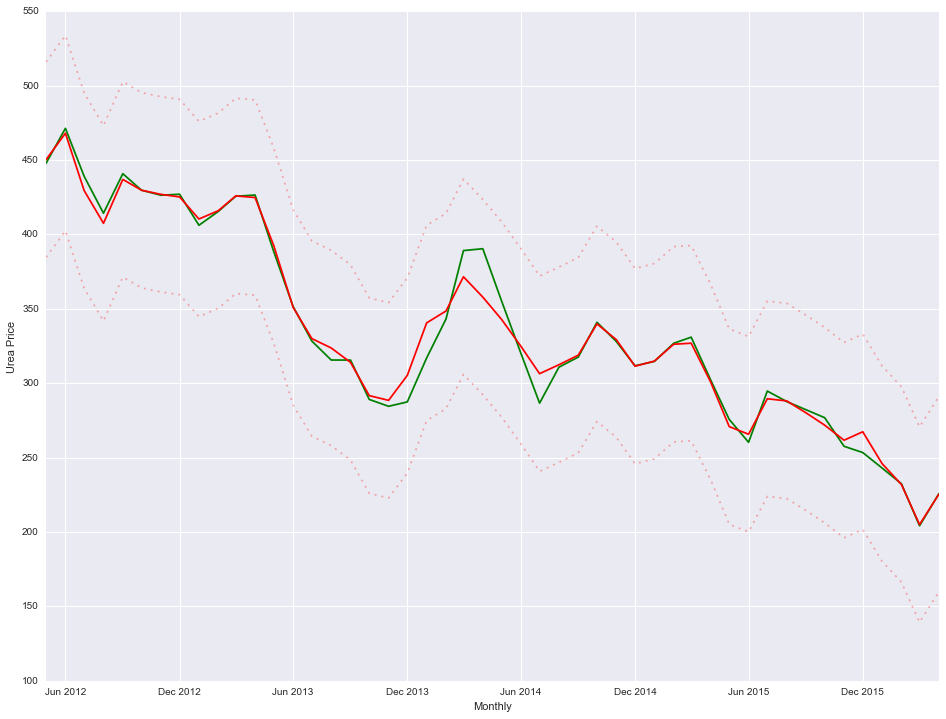

In [22]:
#basic plot of monthly avg actual vs predicted
import matplotlib.pyplot as plt
%matplotlib inline

x = (monthly_avg['Monthly_Date'])
y1 = (monthly_avg['Actual_Monthly_Avg'])
y2 = (monthly_avg['Pred_Monthly_Avg'])
lowerbound2 = (monthly_avg['Lower_Bound'])
upperbound2 = (monthly_avg['Upper_Bound'])

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,lowerbound2,'r--',dashes=(2,5),alpha=0.3)
plt.plot(x,upperbound2,'r--',dashes=(2,5),alpha=0.3)
#plt.fill_between(x,lowerbound2,upperbound2,color='red',alpha=0.5)
plt.xlabel('Monthly')
plt.ylabel('Urea Price')
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
plt.show()

In [23]:
#given these values want to predict 2monthurea
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:]
newpred2 

,latedate,Spotdollar,2monthcrude,2monthcorn
1461,3/1/2016,98.352000,36.150000,355.750000
1462,3/2/2016,98.214000,36.300000,356.250000
1463,3/3/2016,97.592000,36.330000,356.500000
1464,3/4/2016,97.340000,37.750000,358.250000
1465,3/5/2016,97.340000,37.750000,358.250000
1466,3/6/2016,97.340000,37.750000,358.250000
1467,3/7/2016,97.071000,39.820000,359.000000
1468,3/8/2016,97.209000,38.420000,360.500000
1469,3/9/2016,97.173000,40.070000,359.500000
1470,3/10/2016,96.066000,39.400000,362.750000


In [24]:
#new predictions
newpred_predicted = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
newpred2

,latedate,Spotdollar,2monthcrude,2monthcorn,Predicted Urea_Sec1_Suggest
0,3/1/2016,98.352,36.15,355.75,223.952
1,3/2/2016,98.214,36.3,356.25,227.275
2,3/3/2016,97.592,36.33,356.5,229.137
3,3/4/2016,97.34,37.75,358.25,228.795
4,3/5/2016,97.34,37.75,358.25,228.795
5,3/6/2016,97.34,37.75,358.25,228.795
6,3/7/2016,97.071,39.82,359,253.943
7,3/8/2016,97.209,38.42,360.5,231.649
8,3/9/2016,97.173,40.07,359.5,252.275
9,3/10/2016,96.066,39.4,362.75,261.967


In [107]:
#monthly predictions for may_16 to feb_21
may_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][0:31]
jun_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][31:61]
jul_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][61:92]
aug_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][92:122]
sep_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][122:153]
oct_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][153:184]
nov_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][184:214]
dec_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][214:245]
jan_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][245:275]
feb_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][275:306]
mar_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][306:337]
apr_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][337:365]
may_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][365:396]
jun_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][396:426]
jul_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][426:457]
aug_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][457:487]
sep_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][487:518]
oct_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][518:549]
nov_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][549:579]
dec_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][579:610]
jan_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][610:640]
feb_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][640:671]
mar_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][671:702]
apr_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][702:730]
may_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][730:761]
jun_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][761:791]
jul_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][791:822]
aug_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][822:852]
sep_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][852:883]
oct_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][883:914]
nov_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][914:944]
dec_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][944:975]
jan_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][975:1005]
feb_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1005:1036]
mar_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1036:1067]
apr_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1067:1095]
may_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1095:1126]
jun_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1126:1156]
jul_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1156:1187]
aug_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1187:1217]
sep_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1217:1248]
oct_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1248:1279]
nov_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1279:1309]
dec_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1309:1340]
jan_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1340:1370]
feb_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1370:1401]
mar_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1401:1432]
apr_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1432:1461]
may_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1461:1492]
jun_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1492:1522]
jul_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1522:1553]
aug_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1553:1583]
sep_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1583:1614]
oct_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1614:1645]
nov_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1645:1675]
dec_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1675:1706]
jan_21 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1706:1736]
feb_21 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1736:1767]

In [108]:
new_pred_monthly_avg = np.array([may_16['Predicted Urea_Sec1_Suggest'].mean(),jun_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_16['Predicted Urea_Sec1_Suggest'].mean(),aug_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_16['Predicted Urea_Sec1_Suggest'].mean(),oct_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_16['Predicted Urea_Sec1_Suggest'].mean(),dec_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_17['Predicted Urea_Sec1_Suggest'].mean(),feb_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_17['Predicted Urea_Sec1_Suggest'].mean(),apr_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_17['Predicted Urea_Sec1_Suggest'].mean(),jun_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_17['Predicted Urea_Sec1_Suggest'].mean(),aug_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_17['Predicted Urea_Sec1_Suggest'].mean(),oct_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_17['Predicted Urea_Sec1_Suggest'].mean(),dec_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_18['Predicted Urea_Sec1_Suggest'].mean(),feb_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_18['Predicted Urea_Sec1_Suggest'].mean(),apr_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_18['Predicted Urea_Sec1_Suggest'].mean(),jun_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_18['Predicted Urea_Sec1_Suggest'].mean(),aug_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_18['Predicted Urea_Sec1_Suggest'].mean(),oct_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_18['Predicted Urea_Sec1_Suggest'].mean(),dec_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_19['Predicted Urea_Sec1_Suggest'].mean(),feb_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_19['Predicted Urea_Sec1_Suggest'].mean(),apr_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_19['Predicted Urea_Sec1_Suggest'].mean(),jun_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_19['Predicted Urea_Sec1_Suggest'].mean(),aug_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_19['Predicted Urea_Sec1_Suggest'].mean(),oct_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_19['Predicted Urea_Sec1_Suggest'].mean(),dec_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_20['Predicted Urea_Sec1_Suggest'].mean(),feb_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_20['Predicted Urea_Sec1_Suggest'].mean(),apr_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_20['Predicted Urea_Sec1_Suggest'].mean(),jun_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_20['Predicted Urea_Sec1_Suggest'].mean(),aug_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_20['Predicted Urea_Sec1_Suggest'].mean(),oct_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_20['Predicted Urea_Sec1_Suggest'].mean(),dec_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_21['Predicted Urea_Sec1_Suggest'].mean(),feb_21['Predicted Urea_Sec1_Suggest'].mean()])
new_pred_monthly_avg

array([ 254.36741261,  250.37784322,  232.00298162,  227.37498617,
        226.68433314,  239.81558097,  244.9215036 ,  252.38845732,
        261.0795643 ,  263.30072881,  265.15741401,  269.23464262,
        268.47850085,  267.06255151,  268.87705952,  274.13460147,
        277.3421694 ,  276.91210554,  273.87792261,  272.04382504,
        272.32326091,  275.1997082 ,  273.18390519,  273.1637372 ,
        273.76569447,  281.21693221,  298.61003126,  305.79015576,
        309.32915208,  309.92744156,  331.11753184,  336.06417427,
        337.09025707,  337.62619972,  338.27070887,  338.44800533,
        338.36127473,  338.63344879,  338.91201666,  339.14259462,
        339.00719408,  337.01264915,  335.30371367,  335.5653661 ,
        340.12258497,  343.03368982,  342.14652013,  340.7993127 ,
        338.25867876,  335.1181283 ,  334.76636063,  334.89549734,
        335.14129151,  335.11225925,  334.83538425,  334.32927538,
        333.3301735 ,  332.51163937])

In [109]:
new_pred_monthly_avg = pd.DataFrame(new_pred_monthly_avg)
new_monthly_date = ['5/2016','6/2016','7/2016','8/2016','9/2016','10/2016','11/2016','12/2016','1/2017','2/2017','3/2017',
                    '4/2017','5/2017','6/2017','7/2017','8/2017','9/2017','10/2017','11/2017','12/2017',
                   '1/2018','2/2018','3/2018','4/2018','5/2018','6/2018','7/2018','8/2018','9/2018','10/2018','11/2018','12/2018',
                   '1/2019','2/2019','3/2019','4/2019','5/2019','6/2019','7/2019','8/2019','9/2019','10/2019','11/2019','12/2019',
                   '1/2020','2/2020','3/2020','4/2020','5/2020','6/2020','7/2020','8/2020','9/2020','10/2020','11/2020','12/2020',
                   '1/2021','2/2021']
new_monthly_date = pd.to_datetime(new_monthly_date)
new_monthly_date.strftime('%b-%y')
new_monthly_date = pd.DataFrame(new_monthly_date)
new_monthly_date.columns = ['Monthly_Date']
new_upperbound = new_pred_monthly_avg + new_pred_monthly_avg.std()
new_lowerbound = new_pred_monthly_avg - new_pred_monthly_avg.std()
new_monthly_date['Pred_Monthly_Avg'] = new_pred_monthly_avg
new_monthly_date['Upper_Bound'] = new_upperbound
new_monthly_date['Lower_Bound'] = new_lowerbound
new_monthly_avg = new_monthly_date
print(new_monthly_avg.dtypes)
new_monthly_avg

Monthly_Date        datetime64[ns]
Pred_Monthly_Avg           float64
Upper_Bound                float64
Lower_Bound                float64
dtype: object


,Monthly_Date,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2016-05-01,254.367413,292.400199,216.334626
1,2016-06-01,250.377843,288.410630,212.345057
2,2016-07-01,232.002982,270.035768,193.970195
3,2016-08-01,227.374986,265.407773,189.342200
4,2016-09-01,226.684333,264.717119,188.651547
5,2016-10-01,239.815581,277.848367,201.782795
6,2016-11-01,244.921504,282.954290,206.888717
7,2016-12-01,252.388457,290.421244,214.355671
8,2017-01-01,261.079564,299.112351,223.046778
9,2017-02-01,263.300729,301.333515,225.267942


In [110]:
frames = [monthly_date,new_monthly_date]
combined = pd.concat(frames)
combined

,Actual_Monthly_Avg,Lower_Bound,Monthly_Date,Pred_Monthly_Avg,Upper_Bound
0,447.772727,384.593064,2012-05-01,450.221005,515.848946
1,471.250000,402.332160,2012-06-01,467.960101,533.588042
2,439.043478,363.820590,2012-07-01,429.448531,495.076472
3,414.190476,341.797070,2012-08-01,407.425011,473.052952
4,440.772727,371.287874,2012-09-01,436.915815,502.543756
5,429.652174,364.030550,2012-10-01,429.658491,495.286432
6,426.300000,361.260048,2012-11-01,426.887989,492.515930
7,426.956522,359.526589,2012-12-01,425.154530,490.782471
8,406.100000,344.676611,2013-01-01,410.304552,475.932493
9,415.388889,350.274858,2013-02-01,415.902799,481.530740


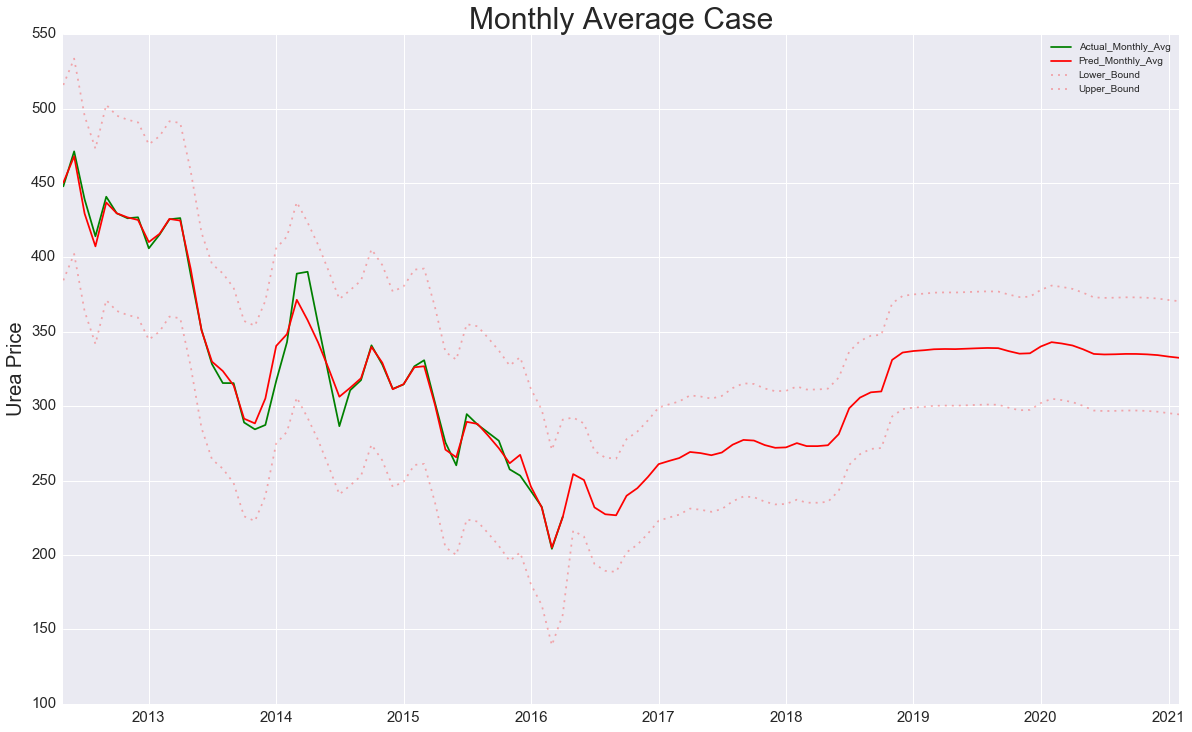

In [138]:

x = (combined['Monthly_Date'])
y1 = (combined['Actual_Monthly_Avg'])
y2 = (combined['Pred_Monthly_Avg'])
lowerboundcom = (combined['Lower_Bound'])
upperboundcom = (combined['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,lowerboundcom,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x,upperboundcom,'r--',dashes=(2,5),alpha=0.3)

#plt.ylabel('Urea Price')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Monthly Average Case', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

## Compare daily 

In [124]:
sec1whole = sec1new
sec1whole['Predicted Urea_Sec1_Suggest'].describe()

count    987.000000
mean     336.647609
std       66.069176
min      193.848333
25%      289.383339
50%      324.579444
75%      399.131803
max      504.737500
Name: Predicted Urea_Sec1_Suggest, dtype: float64

In [125]:
upperbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] + sec1whole['Predicted Urea_Sec1_Suggest'].std()
lowerbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] - sec1whole['Predicted Urea_Sec1_Suggest'].std()
sec1whole['Upper_Bound'] = upperbound_whole
sec1whole['Lower_Bound'] = lowerbound_whole
sec1whole

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest,Upper_Bound,Lower_Bound
0,3/1/2012,78.789,109.27,654,406,415.857500,481.926676,349.788324
1,3/2/2012,79.403,107.17,655,411,419.716667,485.785842,353.647491
2,3/5/2012,79.3,107.18,660.75,409,427.593835,493.663010,361.524659
3,3/6/2012,79.866,105.21,654,425,428.750786,494.819961,362.681610
4,3/7/2012,79.712,106.65,638.75,430,447.442500,513.511676,381.373324
5,3/8/2012,79.139,107.06,635.5,430,441.874417,507.943592,375.805241
6,3/9/2012,80.041,107.87,645,429,480.052500,546.121676,413.983324
7,3/12/2012,79.89,106.84,659.5,433,432.340232,498.409408,366.271056
8,3/13/2012,80.193,107.24,662,431,429.507042,495.576217,363.437866
9,3/14/2012,80.565,105.95,658.75,430,422.870952,488.940128,356.801777


In [128]:
#new predictions daily, 3/1/2016 - 12/31/20
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:3230]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:3230]
newpred_predicted_whole = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred_whole = pd.DataFrame(newpred_predicted_whole)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred_whole
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
upperbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] + newpred2['Predicted Urea_Sec1_Suggest'].std()
lowerbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] - newpred2['Predicted Urea_Sec1_Suggest'].std()
newpred2['Upper_Bound'] = upperbound_wholenew
newpred2['Lower_Bound'] = lowerbound_wholenew
newpred2['Predicted Urea_Sec1_Suggest'].mean()


301.25524489902011

In [131]:
#this shows that I need to change the lastdate object to a date
frames_whole = [sec1whole,newpred2]
combined_whole = pd.concat(frames_whole)
print(combined_whole.dtypes)
combined_whole

2monthcorn                     object
2monthcrude                    object
2monthurea                     object
Lower_Bound                    object
Predicted Urea_Sec1_Suggest    object
Spotdollar                     object
Upper_Bound                    object
latedate                       object
dtype: object


,2monthcorn,2monthcrude,2monthurea,Lower_Bound,Predicted Urea_Sec1_Suggest,Spotdollar,Upper_Bound,latedate
0,654,109.27,406,349.788,415.858,78.789,481.927,3/1/2012
1,655,107.17,411,353.647,419.717,79.403,485.786,3/2/2012
2,660.75,107.18,409,361.525,427.594,79.3,493.663,3/5/2012
3,654,105.21,425,362.682,428.751,79.866,494.82,3/6/2012
4,638.75,106.65,430,381.373,447.442,79.712,513.512,3/7/2012
5,635.5,107.06,430,375.805,441.874,79.139,507.944,3/8/2012
6,645,107.87,429,413.983,480.053,80.041,546.122,3/9/2012
7,659.5,106.84,433,366.271,432.34,79.89,498.409,3/12/2012
8,662,107.24,431,363.438,429.507,80.193,495.576,3/13/2012
9,658.75,105.95,430,356.802,422.871,80.565,488.94,3/14/2012


In [132]:
#changes lastdate column to datetime format
from datetime import datetime
combined_whole['latedate'] = pd.to_datetime(combined_whole['latedate'])
print(combined_whole.dtypes)

2monthcorn                             object
2monthcrude                            object
2monthurea                             object
Lower_Bound                            object
Predicted Urea_Sec1_Suggest            object
Spotdollar                             object
Upper_Bound                            object
latedate                       datetime64[ns]
dtype: object


In [141]:
error = (abs(combined_whole['Predicted Urea_Sec1_Suggest'] - combined_whole['2monthurea'])/combined_whole['2monthurea'])*100
combined_whole['Error']=error
#if want on excel do this : combined_whole.to_csv("C:/Users/msteinme/Documents/averageoutput.csv")

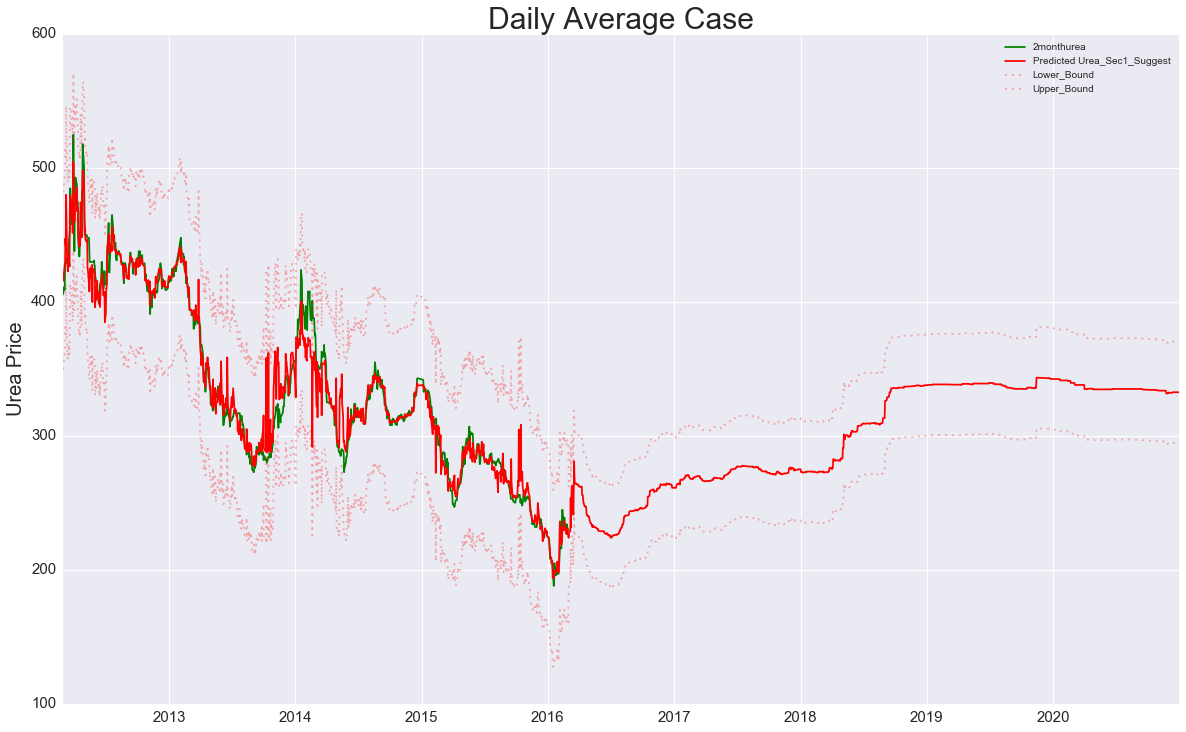

In [137]:
x_whole = (combined_whole['latedate'])
y1_whole = (combined_whole['2monthurea'])
y2_whole = (combined_whole['Predicted Urea_Sec1_Suggest'])
lowerbound_whole = (combined_whole['Lower_Bound'])
upperbound_whole = (combined_whole['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')
ax.plot(x_whole,lowerbound_whole,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x_whole,upperbound_whole,'r--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Daily Average Case', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
#ax.set_xticklabels(x_whole,rotation=30)
plt.show()